In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv("chbmit_preprocessed_data.csv")
df.head()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097150 entries, 0 to 2097149
Data columns (total 24 columns):
 #   Column    Dtype  
---  ------    -----  
 0   # FP1-F7  float64
 1   C3-P3     float64
 2   C4-P4     float64
 3   CZ-PZ     float64
 4   F3-C3     float64
 5   F4-C4     float64
 6   F7-T7     float64
 7   F8-T8     float64
 8   FP1-F3    float64
 9   FP2-F4    float64
 10  FP2-F8    float64
 11  FT10-T8   float64
 12  FT9-FT10  float64
 13  FZ-CZ     float64
 14  P3-O1     float64
 15  P4-O2     float64
 16  P7-O1     float64
 17  P7-T7     float64
 18  P8-O2     float64
 19  T7-FT9    float64
 20  T7-P7     float64
 21  T8-P8-0   float64
 22  T8-P8-1   float64
 23  Outcome   float64
dtypes: float64(24)
memory usage: 384.0 MB


In [5]:
X = df.drop("Outcome", 1)
y = df["Outcome"]

In [6]:
df.shape

(2097150, 24)

In [7]:
df

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


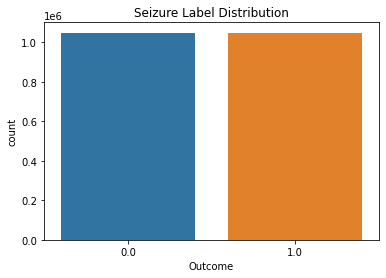

In [8]:
sb.countplot(x="Outcome", data = df)
plt.title('Seizure Label Distribution')
plt.show()

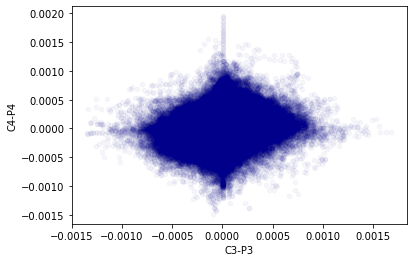

In [9]:
df.plot.scatter(x='C3-P3', y='C4-P4', c='DarkBlue', alpha = 1/30)

- no cluster
- no linear correlation
- moderate outliers

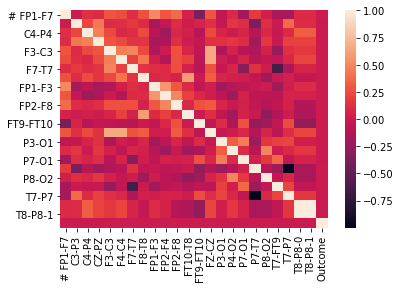

In [10]:
sb.heatmap(df.corr())

- not much correlations
- F3-C3 and FZ-CZ have positive correlaiton
- F7-T7 and FZ-CZ have positive correlation

Text(0.5, 1.0, 'C3-P3')

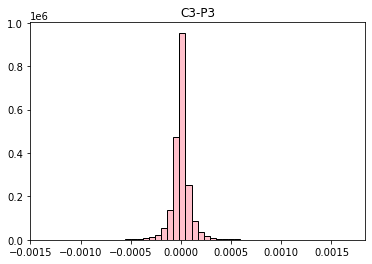

In [11]:
plt.hist(df['C3-P3'], bins = 50, color = 'pink', edgecolor='black', linewidth=1.0)
plt.title('C3-P3')

- distribution of data
- mean is around 0
- histogram is symmetric
- no significant outliers

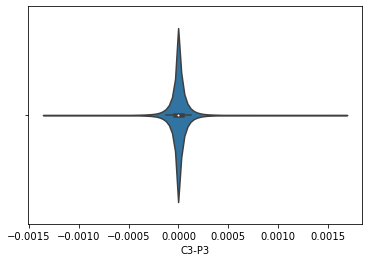

In [12]:
sb.violinplot(data = df, x = "C3-P3")

- roughly symmetric
- mean is 0
- skewed slightly to the left
- no significant outliers

In [13]:
df.describe()

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,...,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2097150.0
mean,2.860975e-07,2.240451e-07,2.069632e-07,2.165756e-07,1.987710e-07,1.810135e-07,2.261609e-07,2.413503e-07,2.743237e-07,2.484646e-07,...,2.118669e-07,2.020708e-07,2.019599e-07,2.165306e-07,2.152381e-07,2.127722e-07,1.954902e-07,1.545795e-07,1.545795e-07,0.5
std,1.286452e-04,1.002525e-04,1.040703e-04,1.025700e-04,1.311180e-04,1.213935e-04,1.361053e-04,1.169298e-04,1.328822e-04,1.335183e-04,...,1.207950e-04,1.123623e-04,1.205056e-04,1.303979e-04,1.101623e-04,1.093535e-04,1.303979e-04,1.192673e-04,1.192673e-04,0.5
min,-1.504078e-03,-1.349451e-03,-1.486105e-03,-1.452894e-03,-1.585348e-03,-2.055678e-03,-1.465006e-03,-1.427497e-03,-1.495092e-03,-1.344664e-03,...,-1.647082e-03,-1.502515e-03,-1.511795e-03,-1.685763e-03,-1.629890e-03,-2.631209e-03,-1.611136e-03,-1.874481e-03,-1.874481e-03,0.0
25%,-4.480000e-05,-3.180000e-05,-3.150000e-05,-3.460000e-05,-4.120000e-05,-3.500000e-05,-4.860000e-05,-4.040000e-05,-4.860000e-05,-4.630000e-05,...,-3.850000e-05,-3.690000e-05,-4.200000e-05,-4.360000e-05,-3.690000e-05,-3.540000e-05,-4.200000e-05,-4.040000e-05,-4.040000e-05,0.0
50%,-1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,-5.860000e-07,-5.860000e-07,...,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,1.950000e-07,2.930000e-07,2.930000e-07,2.930000e-07,0.5
75%,4.200000e-05,3.260000e-05,3.110000e-05,3.500000e-05,4.190000e-05,3.580000e-05,4.790000e-05,4.000000e-05,4.510000e-05,4.200000e-05,...,3.890000e-05,3.770000e-05,4.120000e-05,4.240000e-05,3.690000e-05,3.540000e-05,4.400000e-05,4.200000e-05,4.200000e-05,1.0
max,1.465788e-03,1.682247e-03,1.950183e-03,1.960440e-03,1.799463e-03,1.707546e-03,1.663492e-03,1.473993e-03,1.383736e-03,1.800147e-03,...,1.763516e-03,1.536899e-03,1.296215e-03,1.611526e-03,1.471258e-03,2.630037e-03,1.686154e-03,1.551355e-03,1.551355e-03,1.0


In [14]:
df.dropna(axis = 1)

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [15]:
# Function to remove outlying values that lie > 3 standard deviations away from the mean
def remove_outliers(df, columns, n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean() # mean
        sd = df[col].std() # standard deviation
        
        df = df[(df[col] <= mean+(n_std*sd))] # criteria
        
    return df

In [16]:
columns = ['# FP1-F7', 'C3-P3', 'C4-P4', 'CZ-PZ', 'F3-C3', 'F4-C4', 'F7-T7',
       'F8-T8', 'FP1-F3', 'FP2-F4', 'FP2-F8', 'FT10-T8', 'FT9-FT10', 'FZ-CZ',
       'P3-O1', 'P4-O2', 'P7-O1', 'P7-T7', 'P8-O2', 'T7-FT9', 'T7-P7',
       'T8-P8-0', 'T8-P8-1']
df = remove_outliers(df, columns, 3)


Working on column: # FP1-F7
Working on column: C3-P3
Working on column: C4-P4
Working on column: CZ-PZ
Working on column: F3-C3
Working on column: F4-C4
Working on column: F7-T7
Working on column: F8-T8
Working on column: FP1-F3
Working on column: FP2-F4
Working on column: FP2-F8
Working on column: FT10-T8
Working on column: FT9-FT10
Working on column: FZ-CZ
Working on column: P3-O1
Working on column: P4-O2
Working on column: P7-O1
Working on column: P7-T7
Working on column: P8-O2
Working on column: T7-FT9
Working on column: T7-P7
Working on column: T8-P8-0
Working on column: T8-P8-1


In [16]:
df_copy = df.copy()

In [17]:
df.columns

Index(['# FP1-F7', 'C3-P3', 'C4-P4', 'CZ-PZ', 'F3-C3', 'F4-C4', 'F7-T7',
       'F8-T8', 'FP1-F3', 'FP2-F4', 'FP2-F8', 'FT10-T8', 'FT9-FT10', 'FZ-CZ',
       'P3-O1', 'P4-O2', 'P7-O1', 'P7-T7', 'P8-O2', 'T7-FT9', 'T7-P7',
       'T8-P8-0', 'T8-P8-1', 'Outcome'],
      dtype='object')

In [18]:
import sklearn
print(sklearn.__version__)

1.1.2


In [19]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
y = df.iloc[:,23:]
X = df.iloc[:,:23]
# summarize the dataset
print(X.shape, y.shape)

(1708537, 23) (1708537, 1)


Feature: 0, Score: 0.03597
Feature: 1, Score: 0.03615
Feature: 2, Score: 0.14851
Feature: 3, Score: 0.04899
Feature: 4, Score: 0.03699
Feature: 5, Score: 0.03608
Feature: 6, Score: 0.05759
Feature: 7, Score: 0.03377
Feature: 8, Score: 0.03670
Feature: 9, Score: 0.03090
Feature: 10, Score: 0.03025
Feature: 11, Score: 0.03578
Feature: 12, Score: 0.11186
Feature: 13, Score: 0.04768
Feature: 14, Score: 0.03589
Feature: 15, Score: 0.03664
Feature: 16, Score: 0.03497
Feature: 17, Score: 0.02056
Feature: 18, Score: 0.03078
Feature: 19, Score: 0.04956
Feature: 20, Score: 0.02810
Feature: 21, Score: 0.01953
Feature: 22, Score: 0.01676


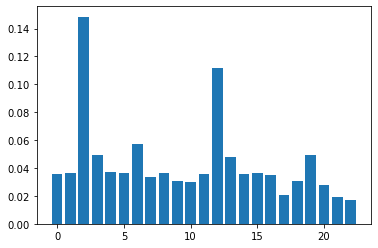

In [20]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [17]:
df = df.drop('P7-T7',1)

In [18]:
df = df.drop('T7-P7',1)

In [19]:
df = df.drop('T8-P8-0',1)

In [20]:
df = df.drop('T8-P8-1',1)

removed all columns with feature importance less than 0.03

In [25]:
df.shape

(1708537, 20)

In [26]:
y = df.iloc[:,19:]
X = df.iloc[:,:19]

In [27]:
y

,Outcome
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
2097145,1.0
2097146,1.0
2097147,1.0
2097148,1.0


In [28]:
X

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,FP2-F8,FT10-T8,FT9-FT10,FZ-CZ,P3-O1,P4-O2,P7-O1,P8-O2,T7-FT9
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,0.000040,0.000013,-0.000014,3.380000e-05,0.000024,-0.000030,0.000010,-0.000037,0.000008
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,0.000044,0.000012,-0.000015,3.070000e-05,0.000026,-0.000017,0.000012,-0.000029,0.000010
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,0.000043,0.000010,-0.000013,2.910000e-05,0.000027,-0.000018,0.000014,-0.000034,0.000012
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,0.000036,0.000009,-0.000012,2.830000e-05,0.000030,-0.000024,0.000015,-0.000042,0.000009
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,0.000035,0.000006,-0.000015,2.910000e-05,0.000032,-0.000014,0.000017,-0.000031,0.000009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,0.000012,-0.000023,-0.000074,4.100000e-06,-0.000036,0.000072,-0.000046,0.000070,-0.000169
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,0.000013,-0.000036,-0.000097,4.100000e-06,-0.000031,0.000087,-0.000049,0.000076,-0.000152
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,0.000013,-0.000034,-0.000127,-9.770000e-07,-0.000033,0.000106,-0.000058,0.000075,-0.000145
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,0.000013,-0.000037,-0.000156,-9.570000e-06,-0.000036,0.000107,-0.000073,0.000068,-0.000129


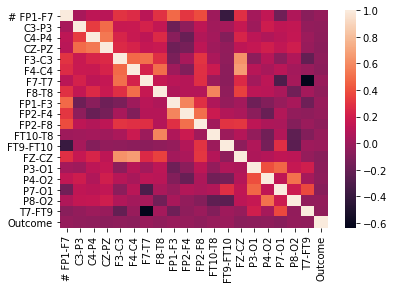

In [29]:
sb.heatmap(df.corr())

     feature       VIF
0   # FP1-F7  5.423918
1      C3-P3  1.976018
2      C4-P4  2.357368
3      CZ-PZ  1.920421
4      F3-C3  4.171994
5      F4-C4  3.975763
6      F7-T7  5.538592
7      F8-T8  4.769062
8     FP1-F3  4.367270
9     FP2-F4  4.242067
10    FP2-F8  5.022523
11   FT10-T8  2.446157
12  FT9-FT10  3.451140
13     FZ-CZ  2.705812
14     P3-O1  2.636759
15     P4-O2  2.697196
16     P7-O1  2.436915
17     P8-O2  2.029631
18    T7-FT9  3.021760


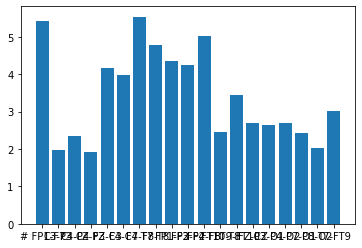

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)
pyplot.bar([x for x in (vif_data["feature"])], vif_data["VIF"])
pyplot.show()

In [21]:
df = df.drop('# FP1-F7',1)

In [22]:
df = df.drop('FP2-F8',1)

In [23]:
y = df.iloc[:,17:]
X = df.iloc[:,:17]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

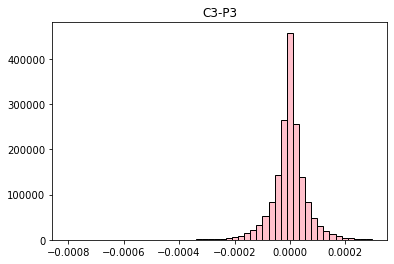

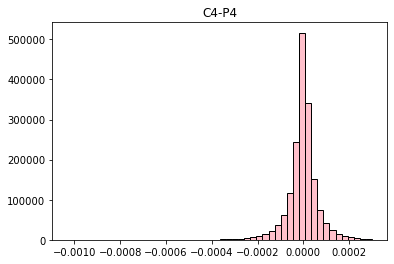

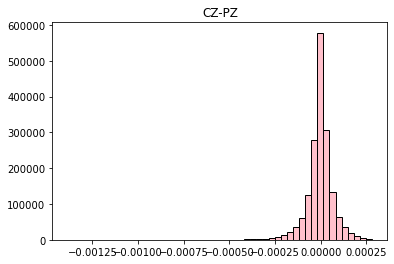

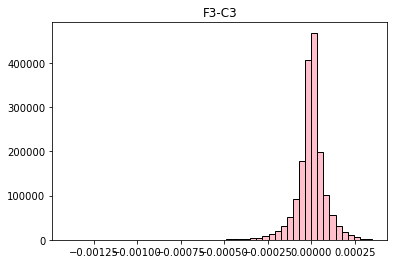

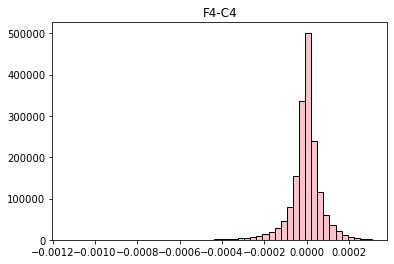

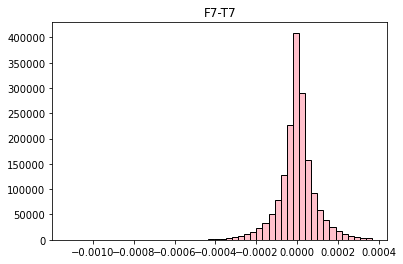

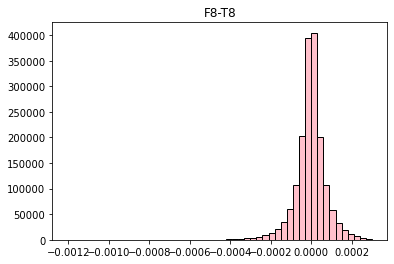

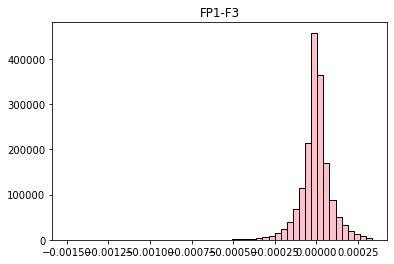

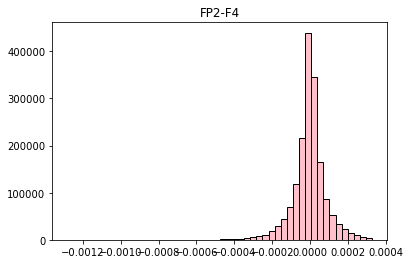

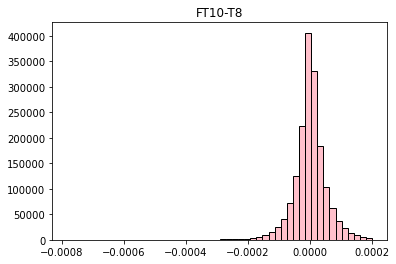

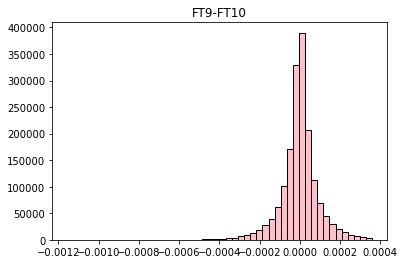

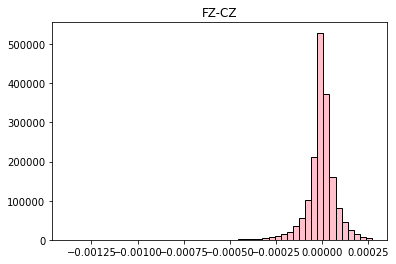

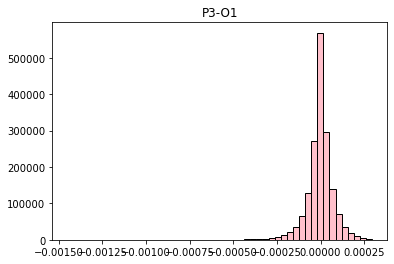

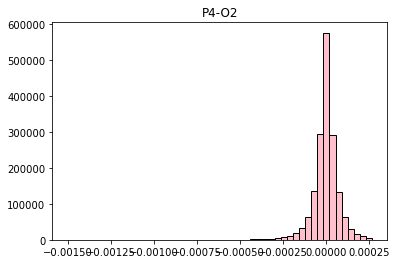

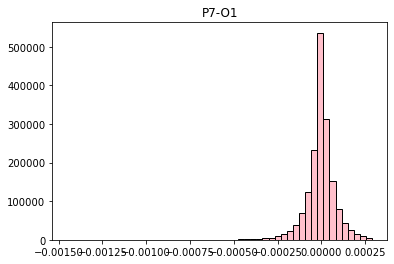

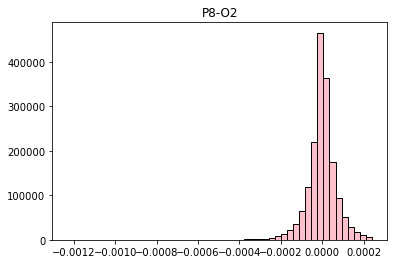

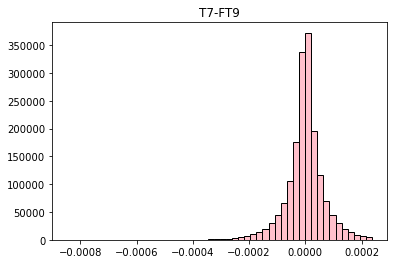

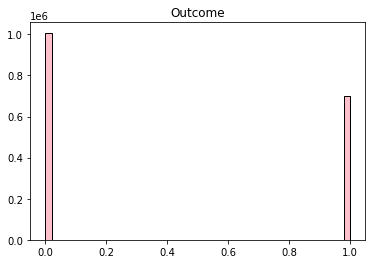

In [35]:
for i in df.columns:
    plt.hist(df[i], bins = 50, color = 'pink', edgecolor='black', linewidth=1.0)
    plt.title(i)
    plt.show()

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)

In [107]:
knn_model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [108]:
knn_model.score(X_test, y_test, sample_weight=None)

0.945353927915062

In [109]:
y_pred = knn_model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    201420
           1       0.97      0.90      0.93    140288

    accuracy                           0.95    341708
   macro avg       0.95      0.94      0.94    341708
weighted avg       0.95      0.95      0.95    341708



In [110]:
roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1])

0.9740168027805501

In [111]:
confusion_mat = confusion_matrix(y_test,y_pred)

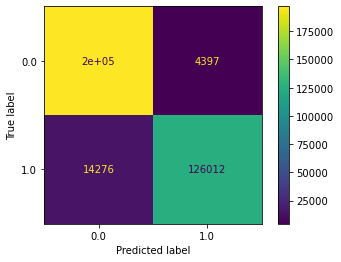

In [112]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [113]:
knn_model.kneighbors_graph(X)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 4 features, but KNeighborsClassifier is expecting 17 features as input.

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
clf.score(X_test, y_test, sample_weight=None)

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
confusion_mat = confusion_matrix(y_test,y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [1]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#tree.plot_tree(clf)from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
confusion_mat = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()
clf.score(X_test, y_test, sample_weight=None)

NameError: name 'X_train' is not defined

In [ ]:
from sklearn.metrics import classification_report
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
confusion_mat = confusion_matrix(y_test,y_pred)

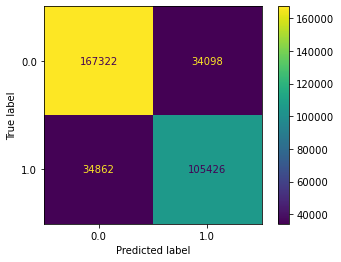

In [65]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test, sample_weight=None)

<ipython-input-66-7742df23fc16>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


0.6929600711718777

In [67]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.67      0.95      0.78    201420
           1       0.81      0.33      0.47    140288

    accuracy                           0.69    341708
   macro avg       0.74      0.64      0.63    341708
weighted avg       0.73      0.69      0.65    341708



In [68]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.813350112252024

In [69]:
confusion_mat = confusion_matrix(y_test,y_pred)

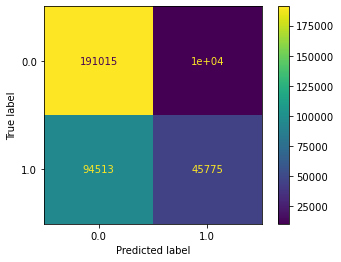

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test, sample_weight=None)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7597744272887963

In [72]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81    201420
           1       0.74      0.64      0.69    140288

    accuracy                           0.76    341708
   macro avg       0.76      0.74      0.75    341708
weighted avg       0.76      0.76      0.76    341708



In [73]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8363015460610597

In [74]:
confusion_mat = confusion_matrix(y_test,y_pred)

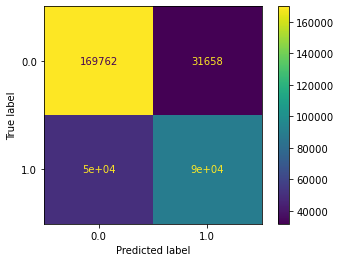

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7610357381155841

In [77]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81    201420
           1       0.74      0.65      0.69    140288

    accuracy                           0.76    341708
   macro avg       0.76      0.74      0.75    341708
weighted avg       0.76      0.76      0.76    341708



In [78]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

0.8371128742627845

In [79]:
confusion_mat = confusion_matrix(y_test,y_pred)

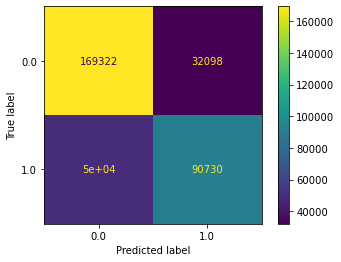

In [80]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

confusion_mat = confusion_matrix(y_test,y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)*100
#confusion_mat = confusion_matrix(y_test,y_pred)

In [82]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')

mlp_clf.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300)

In [83]:
mlp_clf.score(X_test, y_test)

0.5894506420686668

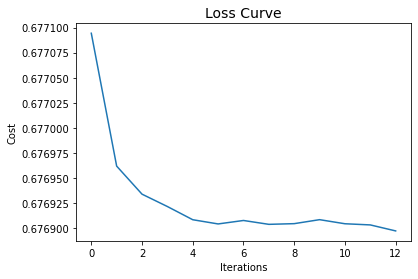

In [84]:
plt.plot(mlp_clf.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [85]:
y_pred = mlp_clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.59      1.00      0.74    201420
           1       0.00      0.00      0.00    140288

    accuracy                           0.59    341708
   macro avg       0.29      0.50      0.37    341708
weighted avg       0.35      0.59      0.44    341708



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
roc_auc_score(y_test, mlp_clf.predict_proba(X_test)[:, 1])

0.5

In [87]:
confusion_mat = confusion_matrix(y_test,y_pred)

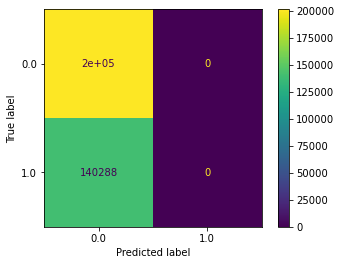

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

In [89]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [90]:
model = Sequential()
model.add(Dense(12, input_shape=(None,17), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 12)          216       
_________________________________________________________________
dense_1 (Dense)              (None, None, 8)           104       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_crossentropy','accuracy'])

In [99]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10)


Epoch 1/50
136683/136683 [==============================] - 218s 2ms/step - loss: 0.5132 - binary_crossentropy: 0.5132 - accuracy: 0.7512
Epoch 2/50
136683/136683 [==============================] - 226s 2ms/step - loss: 0.5126 - binary_crossentropy: 0.5126 - accuracy: 0.7514
Epoch 3/50
136683/136683 [==============================] - 219s 2ms/step - loss: 0.5119 - binary_crossentropy: 0.5119 - accuracy: 0.75180s - loss: 0.5119 - binary_crossentropy: 0.5119 - accuracy: 0. - ETA: 0s - loss: 0.5120 - binary
Epoch 4/50
136683/136683 [==============================] - 211s 2ms/step - loss: 0.5115 - binary_crossentropy: 0.5115 - accuracy: 0.7519
Epoch 5/50
136683/136683 [==============================] - 223s 2ms/step - loss: 0.5109 - binary_crossentropy: 0.5109 - accuracy: 0.7524
Epoch 6/50
136683/136683 [==============================] - 207s 2ms/step - loss: 0.5104 - binary_crossentropy: 0.5104 - accuracy: 0.7523
Epoch 7/50
136683/136683 [==============================] - 216s 2ms/step - 

In [105]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10)



Epoch 1/50
136683/136683 [==============================] - 204s 1ms/step - loss: 0.4768 - binary_crossentropy: 0.4768 - accuracy: 0.7743
Epoch 2/50
136683/136683 [==============================] - 203s 1ms/step - loss: 0.4768 - binary_crossentropy: 0.4768 - accuracy: 0.7745
Epoch 3/50
136683/136683 [==============================] - 204s 1ms/step - loss: 0.4767 - binary_crossentropy: 0.4767 - accuracy: 0.7747
Epoch 4/50
136683/136683 [==============================] - 204s 1ms/step - loss: 0.4766 - binary_crossentropy: 0.4766 - accuracy: 0.7745
Epoch 5/50
136683/136683 [==============================] - 204s 1ms/step - loss: 0.4765 - binary_crossentropy: 0.4765 - accuracy: 0.7745
Epoch 6/50
136683/136683 [==============================] - 206s 2ms/step - loss: 0.4765 - binary_crossentropy: 0.4765 - accuracy: 0.7744
Epoch 7/50
136683/136683 [==============================] - 206s 2ms/step - loss: 0.4765 - binary_crossentropy: 0.4765 - accuracy: 0.7746
Epoch 8/50
136683/136683 [========

In [101]:
accuracy = model.evaluate(X_test,y_test)

10679/10679 [==============================] - 13s 1ms/step - loss: 0.4785 - binary_crossentropy: 0.4785 - accuracy: 0.7737


In [102]:
accuracy

[0.47850751876831055, 0.47850751876831055, 0.7736839652061462]

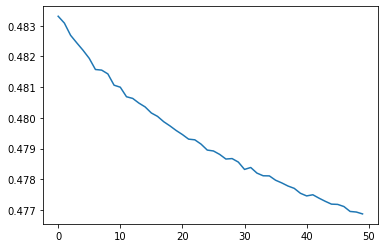

In [103]:
plt.plot(history.history["loss"])

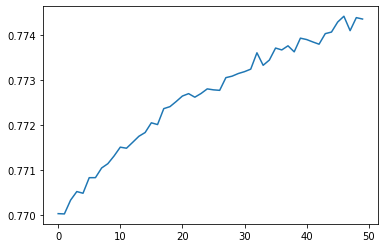

In [104]:
plt.plot(history.history["accuracy"])

In [97]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, labels=[0,1]))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [98]:
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
confusion_mat = confusion_matrix(y_test,y_pred)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=clf.classes_)
disp.plot()
plt.show()

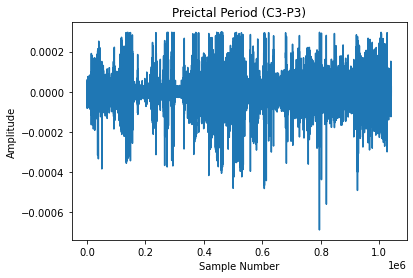

In [52]:
x = df['C3-P3']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (C3-P3)")
plt.show()

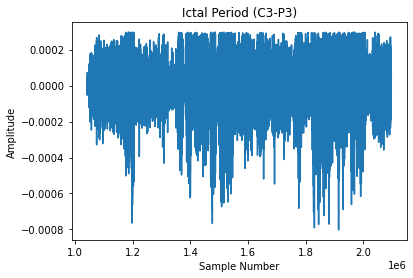

In [42]:
x = df['C3-P3']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (C3-P3)")
plt.show()

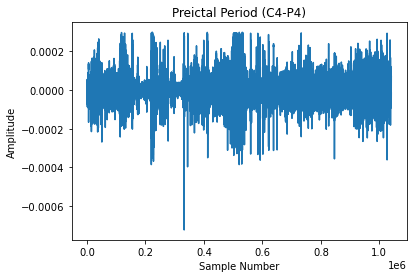

In [43]:
x = df['C4-P4']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (C4-P4)")
plt.show()

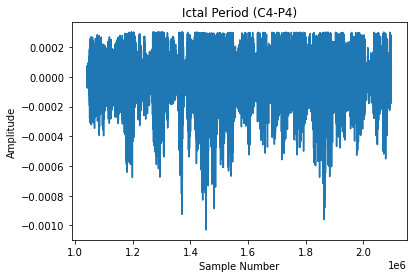

In [44]:
x = df['C4-P4']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (C4-P4)")
plt.show()

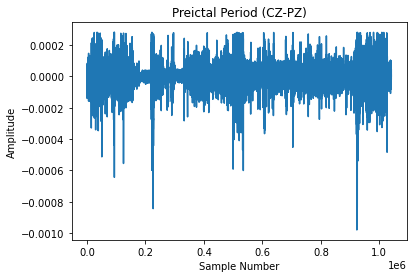

In [45]:
x = df['CZ-PZ']
x[:1000000].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Preictal Period (CZ-PZ)")
plt.show()

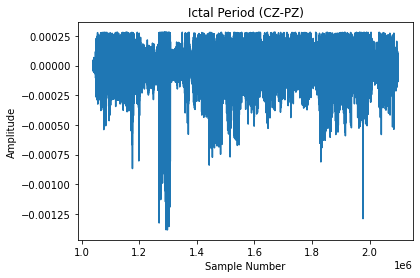

In [46]:
x = df['CZ-PZ']
x[1000000:].plot()
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.title("Ictal Period (CZ-PZ)")
plt.show()

In [ ]:
f1_score(y_true, y_pred, average='micro')
roc_auc_score(y, clf.decision_function(X))
print(classification_report(y_true, y_pred, labels=[1, 2, 3]))